# Data Exploration and Analysis

### Importing Necessary Libraries
First, we import essential libraries for data manipulation, analysis, and visualization:


In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

### Load the Dataset and Display the First 10 Rows

In [156]:
df = pd.read_csv('used_cars.csv')
df.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


### Before starting the EDA, we'll clean the DataSet

#### -  check DataSet

In [157]:
df.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


####  - Data processing

#####  * Remove Units 

In [159]:
#Remove Units on milage column
df['milage'] = df['milage'].str.replace(',', '').str.replace('mi.', '').astype('float')


# Remove Units on price column
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype('float')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0


#### * Check missing Value

In [160]:
#*-Check-missing-Value
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

#### * Handle missing value

since the missing values are in the categorical variables, we will replace them with the most frequent values.

In [161]:
most_fuel_type = df['fuel_type'].value_counts().idxmax()
most_fuel_type

'Gasoline'

In [162]:
most_accident = df['accident'].value_counts().idxmax()
most_accident

'None reported'

In [163]:
most_clean_title = df['clean_title'].value_counts().idxmax()
most_clean_title

'Yes'

Replace Missing value

In [164]:
df['fuel_type'].fillna(most_fuel_type, inplace=True)
df['accident'].fillna(most_accident, inplace = True)
df['clean_title'].fillna(most_clean_title, inplace = True)

In [165]:
df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [166]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3479
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [167]:
df['fuel_type'].replace('–', 'not supported', inplace=True)

In [168]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Yes,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Yes,34999.0


In [169]:
import re
# Define a function to extract engine attributes
def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''

# Apply the function to create new columns
df[['Horsepower', 'Engine_Displacement']] = df['engine'].apply(extract_engine_attributes).apply(pd.Series)

In [170]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,300.0,3.7L
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,None,3.8L
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Yes,54598.0,None,3.5 Liter
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,354.0,3.5L
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Yes,34999.0,None,2.0L


In [171]:
#convert dtype of Horsepower to float
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors = 'coerce')
df['Horsepower'].dtype

dtype('float64')

In [172]:
#Replace null values in Horsepower with mean
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace = True)
df['Horsepower'].isnull().sum()

0

In [173]:
#strip the L from Engine_Displacement
df['Engine_Displacement'] = df['Engine_Displacement'].str.replace('L', '')

In [174]:
#Change the dtype of Engine_Displacement to numeric
df['Engine_Displacement'] = pd.to_numeric(df['Engine_Displacement'], errors = 'coerce')

In [175]:


#Replace null values in Engine_Displacement with mean
df['Engine_Displacement'].fillna(df['Engine_Displacement'].mean(), inplace = True)
df['Engine_Displacement'].isnull().sum()



0

In [176]:
# The specific word to search for
specific_word = 'Cylinder'

# Function to extract the word before the specific word
def extract_word_before(text, specific_word):
    words = text.split()
    if specific_word in words:
        index = words.index(specific_word)
        if index > 0:
            return words[index - 1]
    return None


# Apply the function to the column and create a new column with the result
df['Cylinder'] = df['engine'].apply(lambda x: extract_word_before(x, specific_word))
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement,Cylinder
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,300.000000,3.700000,V6
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,332.283839,3.800000,None
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,Yes,54598.0,332.283839,3.710836,None
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,354.000000,3.500000,V6
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,Yes,34999.0,332.283839,2.000000,None


In [177]:
df.isnull().sum()

brand                    0
model                    0
model_year               0
milage                   0
fuel_type                0
engine                   0
transmission             0
ext_col                  0
int_col                  0
accident                 0
clean_title              0
price                    0
Horsepower               0
Engine_Displacement      0
Cylinder               945
dtype: int64

In [178]:
most_cylinder = df['Cylinder'].value_counts().idxmax()
most_cylinder

'8'

In [179]:
df['Cylinder'].fillna(most_cylinder, inplace=True)

In [180]:
df.isnull().sum()

brand                  0
model                  0
model_year             0
milage                 0
fuel_type              0
engine                 0
transmission           0
ext_col                0
int_col                0
accident               0
clean_title            0
price                  0
Horsepower             0
Engine_Displacement    0
Cylinder               0
dtype: int64

In [181]:
#drop engine column
df.drop('engine', axis = 1, inplace = True)


In [182]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Engine_Displacement,Cylinder
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,300.000000,3.700000,V6
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,332.283839,3.800000,8
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,Black,None reported,Yes,54598.0,332.283839,3.710836,8
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,354.000000,3.500000,V6
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,None reported,Yes,34999.0,332.283839,2.000000,8


## Data Exploration and Analysis

### Perform Univariate Analysis

#### 1. continious Variable Analysis

In [183]:
#Run Descriptive statistics of Numerical Data
df.describe()

,model_year,milage,price,Horsepower,Engine_Displacement
count,4009.000000,4009.000000,4.009000e+03,4009.000000,4009.000000
mean,2015.515590,64717.551010,4.455319e+04,332.283839,3.710836
std,6.104816,52296.599459,7.871064e+04,109.198512,1.351923
min,1974.000000,100.000000,2.000000e+03,70.000000,0.650000
25%,2012.000000,23044.000000,1.720000e+04,268.000000,2.700000
50%,2017.000000,52775.000000,3.100000e+04,332.283839,3.600000
75%,2020.000000,94100.000000,4.999000e+04,381.000000,4.600000
max,2024.000000,405000.000000,2.954083e+06,1020.000000,8.400000


C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


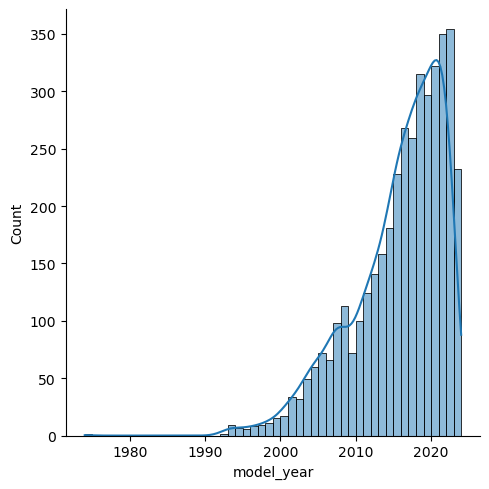

In [184]:
sns.displot(df['model_year'], kde=True)


C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


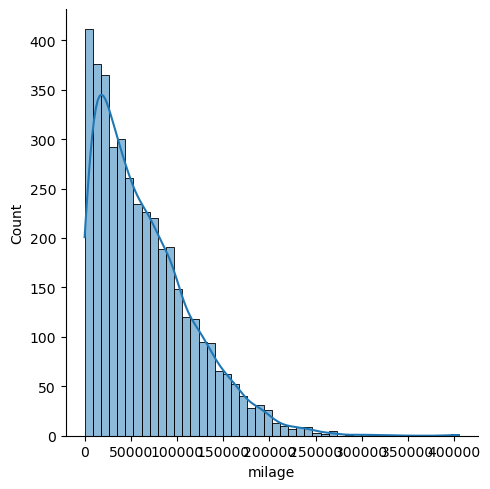

In [185]:
sns.displot(df['milage'], kde=True)


C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


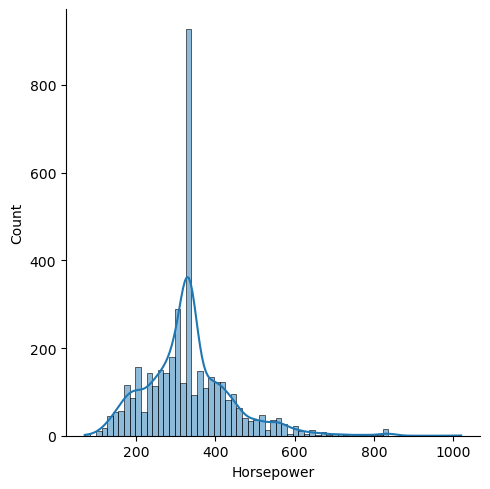

In [186]:
sns.displot(df['Horsepower'], kde=True)

C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


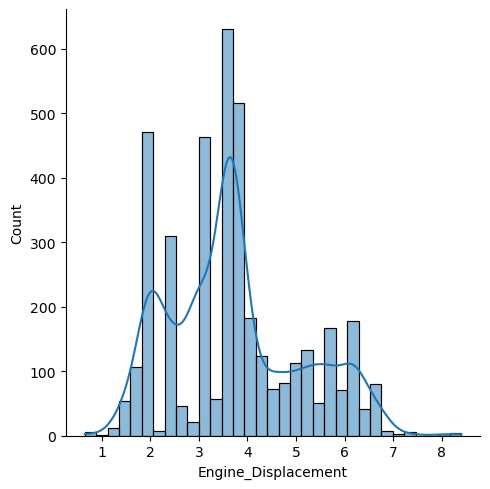

In [187]:
sns.displot(df['Engine_Displacement'], kde=True)

C:\Users\ARMAND\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


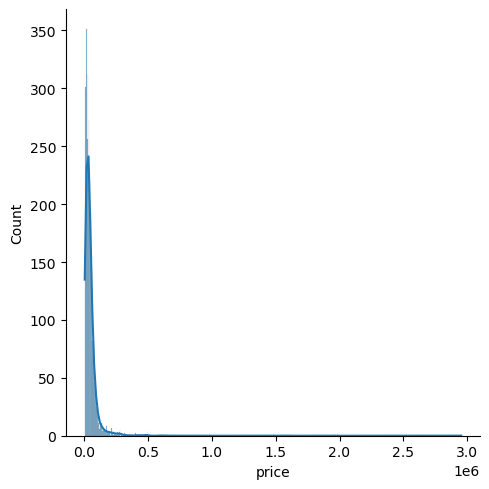

In [188]:
sns.displot(df['price'], kde=True)

<Axes: xlabel='Cylinder', ylabel='count'>

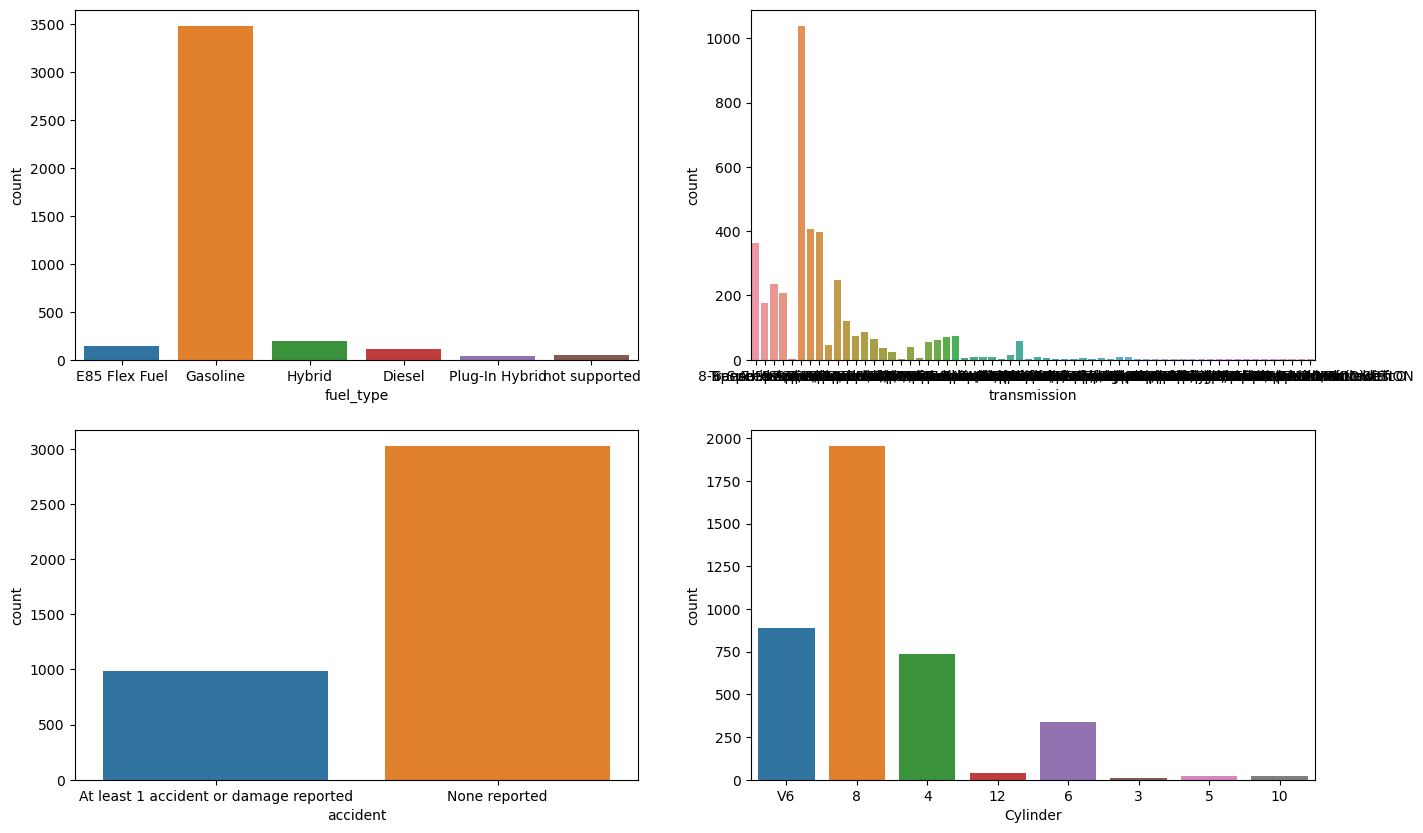

In [189]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


fig, axes = plt.subplots(2,2, figsize=(16, 10))
sns.countplot(x='fuel_type', data=df, ax= axes[0,0])
sns.countplot(x= 'transmission', data=df, ax= axes[0,1])
sns.countplot(x='accident', data=df, ax= axes[1,0])
#sns.countplot(x='clean_title', data=df, ax= axes[0,3])
sns.countplot(x='Cylinder', data=df, ax= axes[1,1])

### Spot and Interpret Outliers and Missing Data

In [190]:
# Checking for skewness
skewness = df[['model_year', 'milage', 'price', 'Horsepower', 'Engine_Displacement']].skew()
print(skewness)

model_year             -1.089231
milage                  1.159975
price                  19.513551
Horsepower              1.060424
Engine_Displacement     0.510497
dtype: float64


In [278]:
# Plotting outliers


<Axes: ylabel='model_year'>

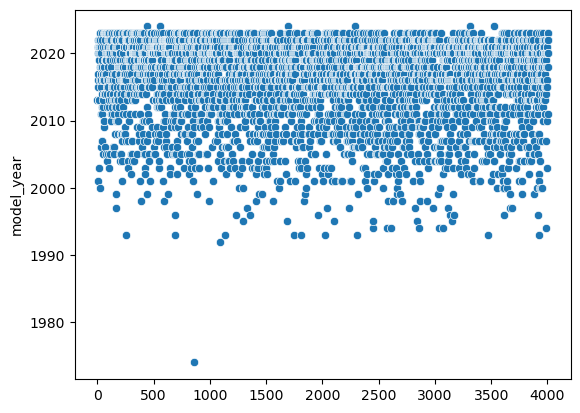

In [192]:
sns.scatterplot(x=df.index, y=df['model_year'])
#sns.boxplot(df['model_year'])

<Axes: ylabel='milage'>

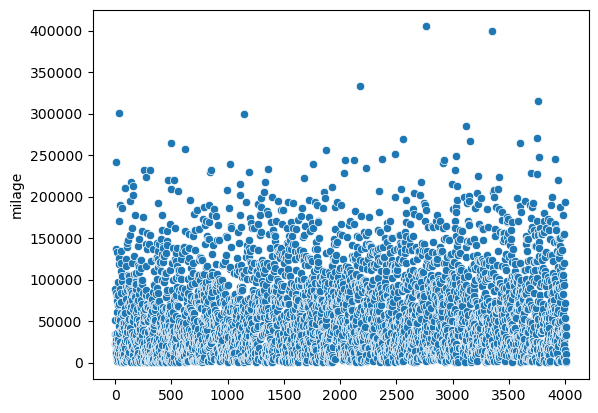

In [193]:
#sns.boxplot(df['milage'])
sns.scatterplot(x=df.index, y=df['milage'])

<Axes: ylabel='price'>

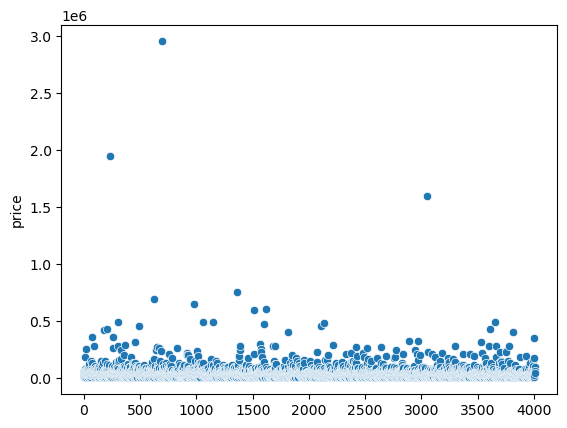

In [194]:
sns.scatterplot(x=df.index, y=df['price'])
#sns.boxplot(df['price'])

<Axes: ylabel='Horsepower'>

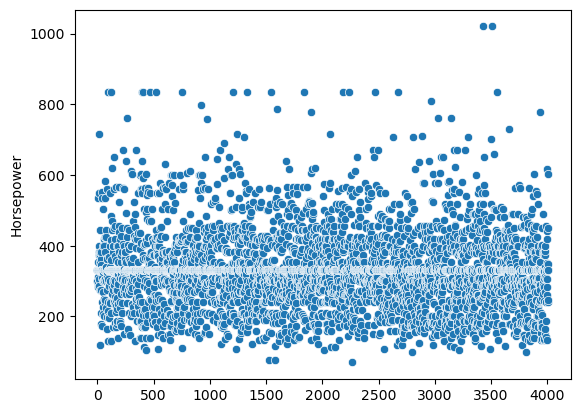

In [195]:
sns.scatterplot(x=df.index, y=df['Horsepower'])
#sns.boxplot(df['Horsepower'])

### Outlier Treatment

In [196]:
# Outlier treatment using z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

In [197]:
# Checking for skewness
skewness = df[['model_year', 'milage', 'price', 'Horsepower', 'Engine_Displacement']].skew()
print(skewness)

model_year            -0.874887
milage                 0.834564
price                  2.948407
Horsepower             0.441262
Engine_Displacement    0.485301
dtype: float64


### Impute Missing Values

### Perform Bivariate Analysis

In [198]:
df.shape

(3853, 14)

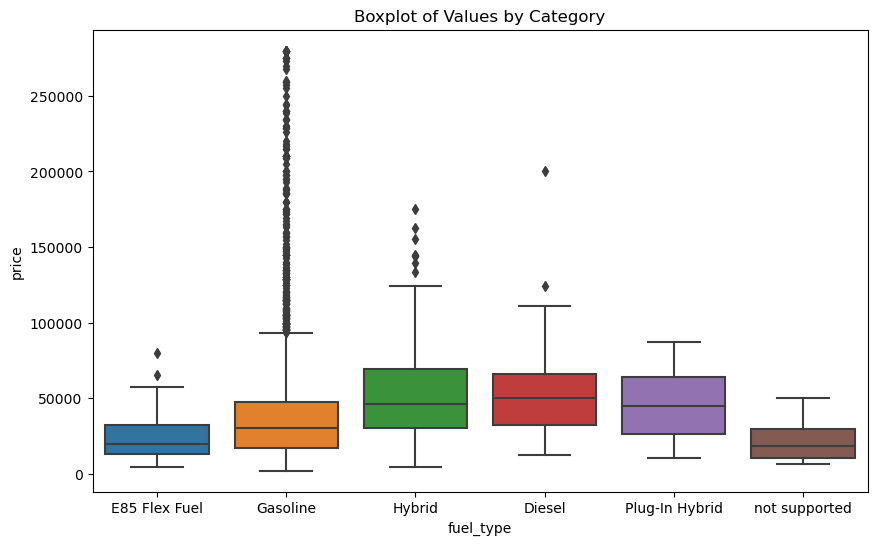

In [199]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title('Boxplot of Values by Category')
plt.show()

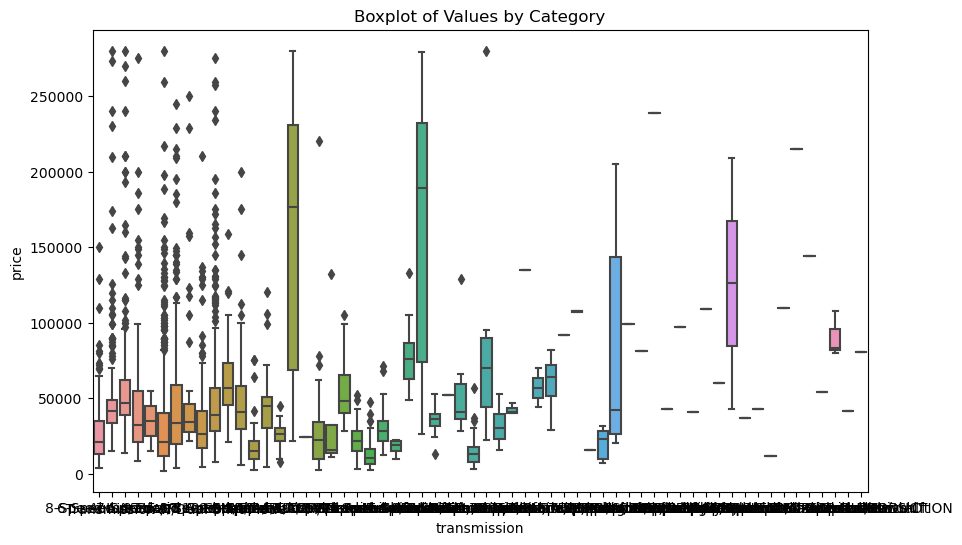

In [200]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Boxplot of Values by Category')
plt.show()

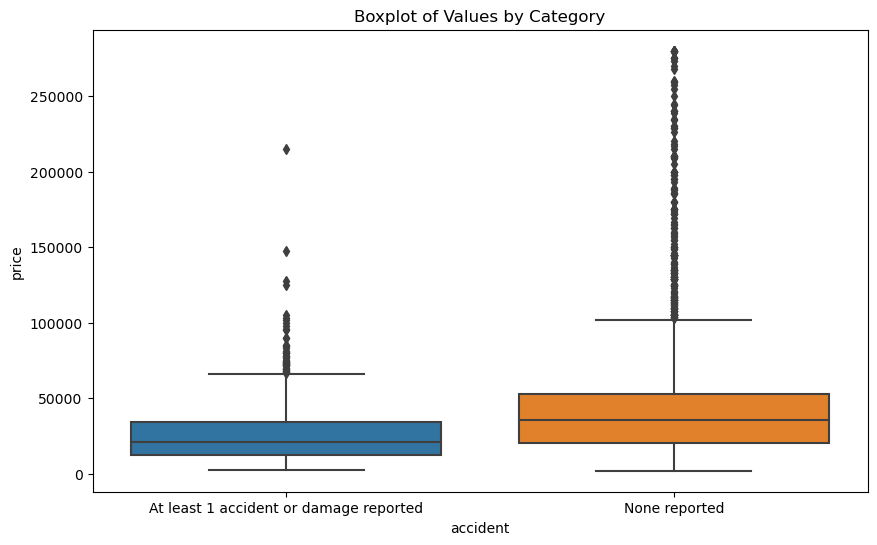

In [201]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='accident', y='price', data=df)
plt.title('Boxplot of Values by Category')
plt.show()

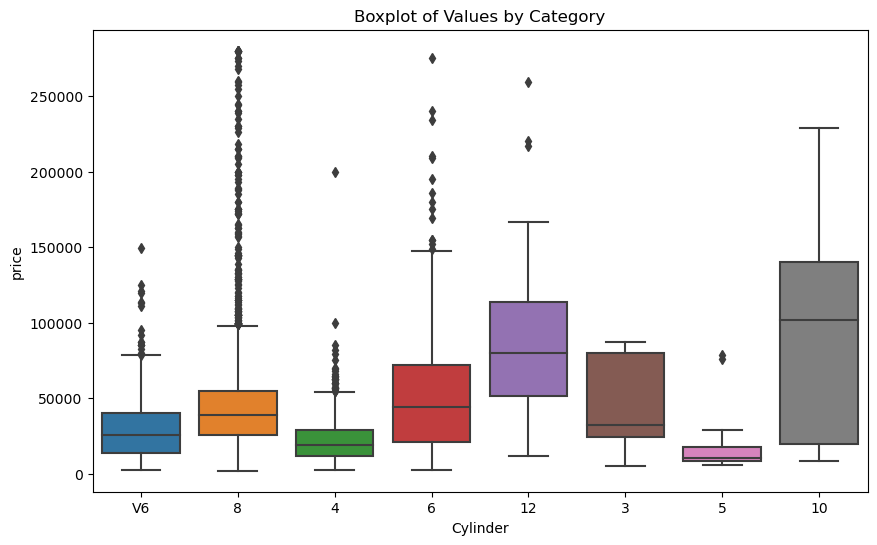

In [202]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cylinder', y='price', data=df)
plt.title('Boxplot of Values by Category')
plt.show()

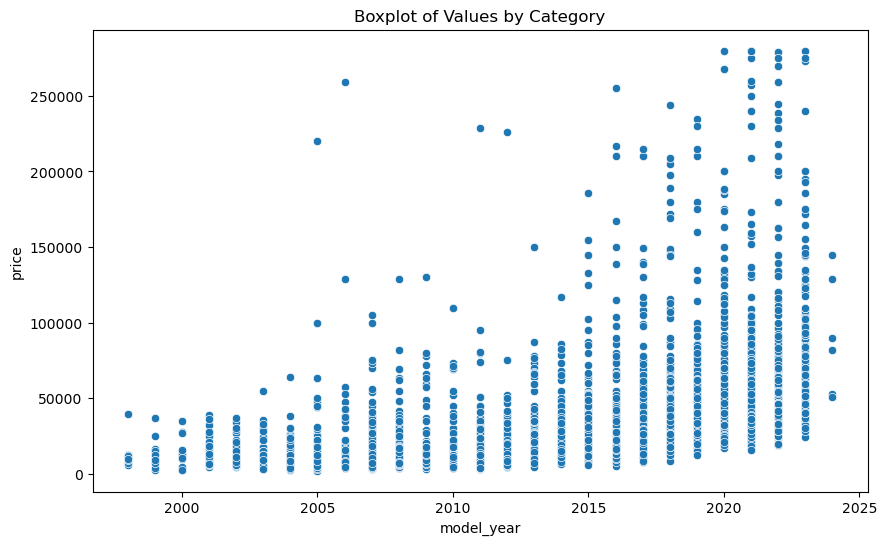

In [203]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='price', data=df)
plt.title('Boxplot of Values by Category')
plt.show()

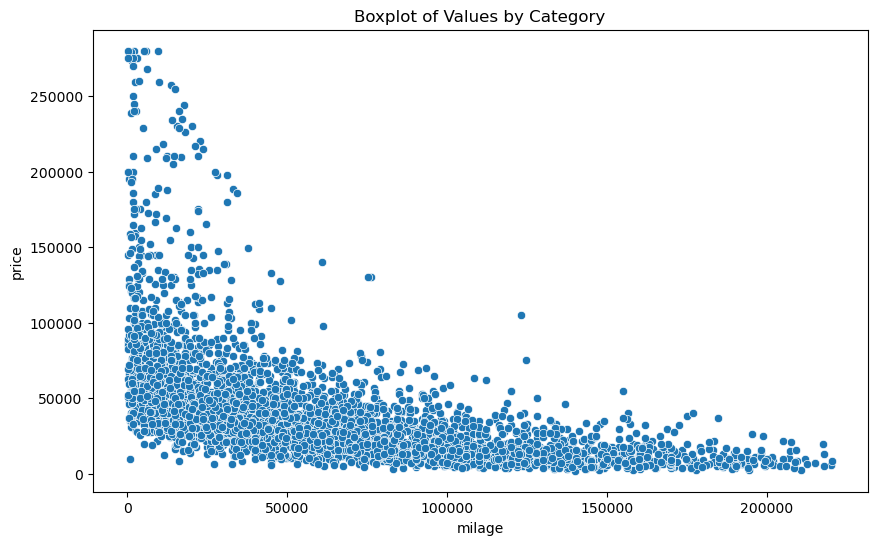

In [204]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='milage', y='price', data=df)
plt.title('Boxplot of Values by Category')
plt.show()

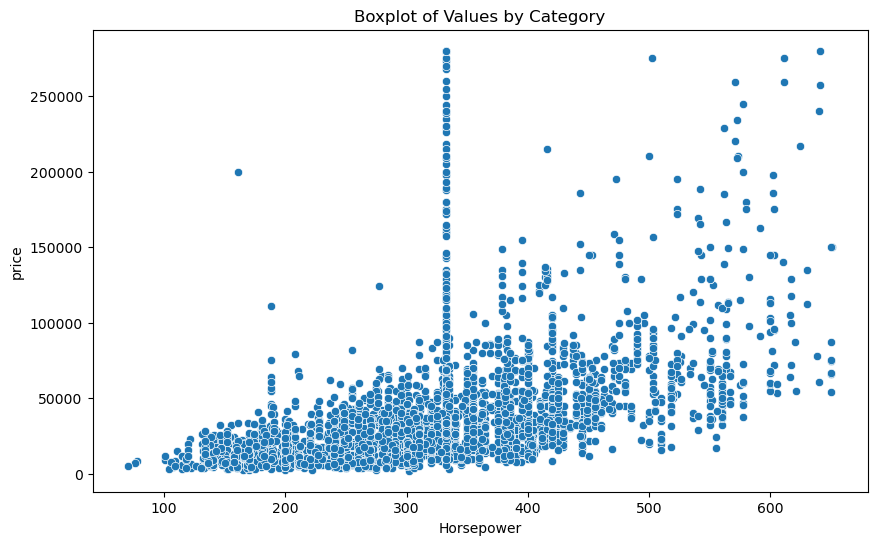

In [205]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horsepower', y='price', data=df)
plt.title('Boxplot of Values by Category')
plt.show()

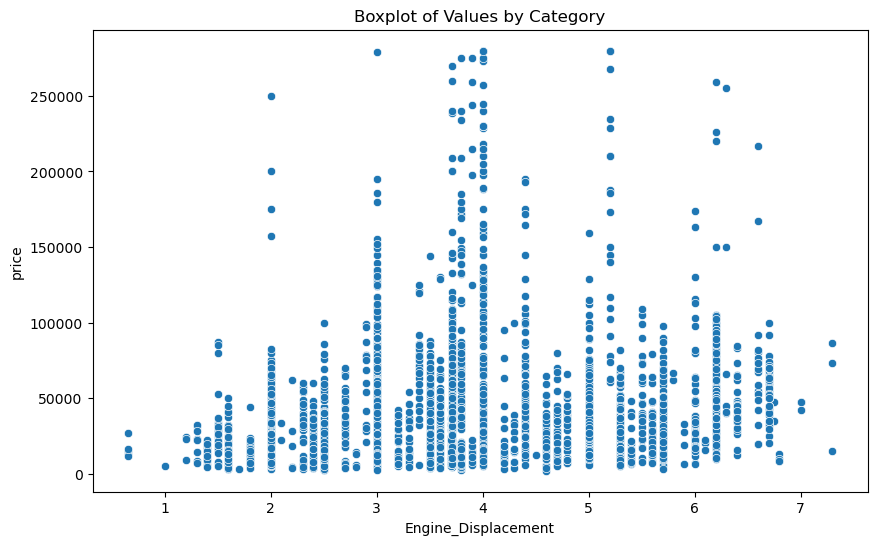

In [206]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine_Displacement', y='price', data=df)
plt.title('Boxplot of Values by Category')
plt.show()

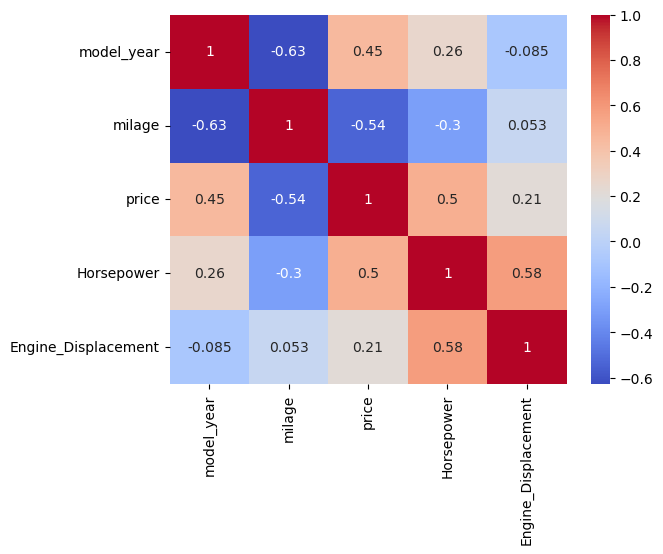

In [207]:
# Correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Data Transformation

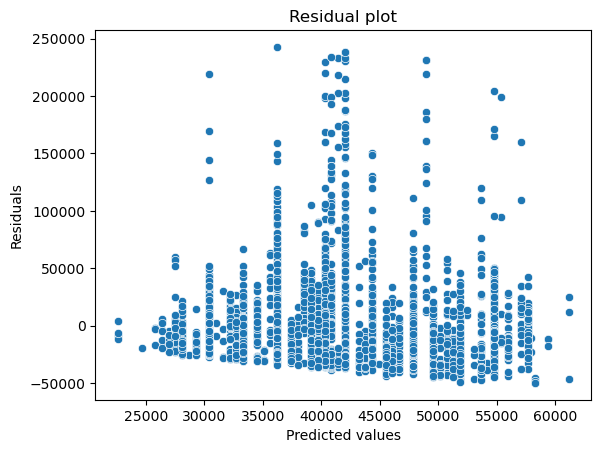

In [208]:
from sklearn.linear_model import LinearRegression
X = df['Engine_Displacement'].values.reshape(-1, 1)
y= df['price']
# Example linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot residuals
residuals = y - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [209]:
correlation = df[['Engine_Displacement', 'price']].corr(method='pearson')
print(correlation)

                     Engine_Displacement     price
Engine_Displacement             1.000000  0.210877
price                           0.210877  1.000000


In [210]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Engine_Displacement'], df['price'])
print(f"Correlation coefficient: {corr}, p-value: {p_value}")

Correlation coefficient: 0.21087738839517697, p-value: 5.543620718636164e-40


In [211]:
from scipy.optimize import curve_fit

def nonlinear_function(x, a, b, c):
    return a * np.exp(b * x) + c

popt, pcov = curve_fit(nonlinear_function, df['Engine_Displacement'], df['price'])

C:\Users\ARMAND\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [212]:
print(popt)

[  304.74315775   -41.18291403 40110.40799766]


In [213]:
print(pcov)

[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


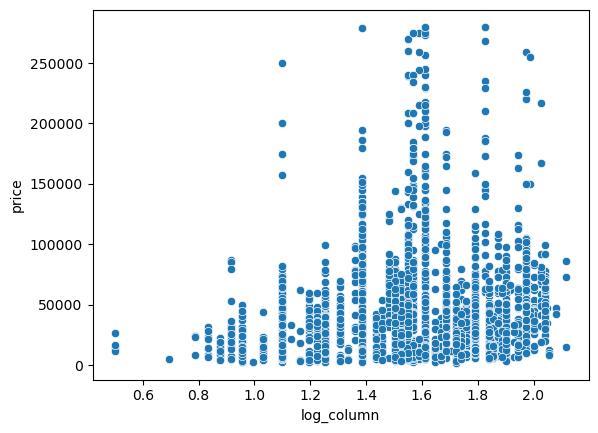

In [214]:
# Transformations (example: log transformation)
df_transformed = df.copy()
df_transformed['log_column'] = np.log(df['Engine_Displacement'] + 1)

# Checking the transformation
sns.scatterplot(x=df_transformed['log_column'], y=df_transformed['price'])
plt.show()

### Test for Multicollinearity

In [215]:
df['brand'].value_counts()

brand
BMW              373
Ford             367
Mercedes-Benz    310
Chevrolet        283
Audi             200
Porsche          195
Toyota           187
Lexus            161
Jeep             140
Land             130
Nissan           112
Cadillac         102
RAM               90
GMC               86
Kia               76
Tesla             75
Dodge             73
Hyundai           72
Subaru            64
Mazda             62
Acura             62
Honda             60
INFINITI          59
Volkswagen        59
Lincoln           52
Jaguar            45
Volvo             36
Maserati          33
MINI              33
Bentley           31
Buick             29
Chrysler          28
Mitsubishi        20
Genesis           20
Alfa              19
Lamborghini       18
Hummer            16
Pontiac           14
Ferrari            9
Aston              8
Scion              6
FIAT               5
McLaren            5
Saturn             5
Lotus              4
Rolls-Royce        4
Lucid              3
Karma  

In [216]:
new_transmission = pd.get_dummies(df['transmission'], prefix = 'trans', dtype=int,  drop_first=True)
new_transmission.head()

,trans_1-Speed Automatic,trans_10-Speed A/T,trans_10-Speed Automatic,trans_10-Speed Automatic with Overdrive,trans_2,trans_2-Speed A/T,trans_2-Speed Automatic,trans_4-Speed A/T,trans_4-Speed Automatic,trans_5-Speed A/T,...,trans_F,trans_M/T,trans_Manual,"trans_Manual, 6-Spd",trans_SCHEDULED FOR OR IN PRODUCTION,trans_Single-Speed Fixed Gear,trans_Transmission Overdrive Switch,trans_Transmission w/Dual Shift Mode,trans_Variable,trans_–
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
new_ext_col = pd.get_dummies(df['ext_col'], prefix = 'trans', dtype=int,  drop_first=True)
new_ext_col.head()

,trans_Alfa White,trans_Alpine White,trans_Alta White,trans_Ametrin Metallic,trans_Anodized Blue Metallic,trans_Anthracite Blue Metallic,trans_Antimatter Blue Metallic,trans_Apex Blue,trans_Arancio Borealis,trans_Arctic Gray Metallic,...,trans_White Platinum Tri-Coat Metallic,trans_Wind Chill Pearl,trans_Wolf Gray,trans_Yellow,trans_Yulong,trans_Yulong White,trans_designo Diamond White,trans_designo Diamond White Bright,trans_designo Diamond White Metallic,trans_–
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [218]:
new_int_col = pd.get_dummies(df['int_col'], prefix = 'trans', dtype=int,  drop_first=True)
new_int_col.head()

,trans_Adrenaline Red,trans_Agave Green,trans_Almond Beige,trans_Amber,trans_Anthracite,trans_Aragon Brown,trans_Ash,trans_BEIGE,trans_BLACK,trans_Beige,...,trans_Titan Black / Quarzit,trans_Tupelo,trans_Very Light Cashmere,trans_WHITE,trans_Walnut,trans_Whisper Beige,trans_White,trans_White / Brown,trans_Yellow,trans_–
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
new_model = pd.get_dummies(df['model'], prefix = 'trans', dtype=int,  drop_first=True)
new_model.head()

,trans_128 i,trans_135 i,trans_135 is,trans_1500 Big Horn,trans_1500 Classic SLT,trans_1500 Classic Tradesman,trans_1500 Classic Warlock,trans_1500 Laramie,trans_1500 Limited,trans_1500 Longhorn,...,trans_e-tron Prestige,trans_i3 120Ah w/Range Extender,trans_i3 94 Ah,trans_i3 Base,trans_i3 Base w/Range Extender,trans_i8 Base,trans_tC Anniversary Edition,trans_tC Base,trans_tC Release Series 6.0,trans_xB Base
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
new_fuel_type = pd.get_dummies(df['fuel_type'], prefix = 'fuel', dtype=int, drop_first=True )
new_fuel_type.head()

,fuel_E85 Flex Fuel,fuel_Gasoline,fuel_Hybrid,fuel_Plug-In Hybrid,fuel_not supported
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [221]:
new_brand = pd.get_dummies(df['brand'], prefix = 'brand', dtype=int, drop_first=True)
new_brand.head()

,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Buick,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Dodge,...,brand_Saab,brand_Saturn,brand_Scion,brand_Subaru,brand_Suzuki,brand_Tesla,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
df['accident'].replace("At least 1 accident or damage reported", "one", inplace = True)
df['accident'].replace("None reported", "none", inplace = True)
new_accident = pd.get_dummies(df['accident'], prefix = 'acc', dtype=int, drop_first=True)
new_accident.head()

,acc_one
0,1
1,1
2,0
3,0
4,0


In [223]:
new_Cylinder = pd.get_dummies(df['Cylinder'], prefix = 'Cylinder', dtype=int, drop_first=True)
new_Cylinder.head()

,Cylinder_12,Cylinder_3,Cylinder_4,Cylinder_5,Cylinder_6,Cylinder_8,Cylinder_V6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0


In [224]:
train = pd.concat([df,  new_fuel_type, new_brand, new_transmission, new_Cylinder, new_accident], axis=1)
train.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,...,trans_Variable,trans_–,Cylinder_12,Cylinder_3,Cylinder_4,Cylinder_5,Cylinder_6,Cylinder_8,Cylinder_V6,acc_one
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,one,Yes,...,0,0,0,0,0,0,0,0,1,1
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,one,Yes,...,0,0,0,0,0,0,0,1,0,1
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,Black,none,Yes,...,0,0,0,0,0,0,0,1,0,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,none,Yes,...,0,0,0,0,0,0,0,0,1,0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,none,Yes,...,0,0,0,0,0,0,0,1,0,0


In [225]:
y= train['price']


In [226]:
train = train.drop('model', axis =1)
train = train.drop('brand', axis =1)
train = train.drop('transmission', axis = 1)
train = train.drop('ext_col', axis = 1)
train = train.drop('int_col', axis = 1)
train = train.drop('accident', axis = 1)
#train = train.drop('clean_title', axis = 1)
train = train.drop('fuel_type', axis = 1)
train = train.drop('Cylinder', axis = 1)

In [227]:
train = train.drop('clean_title', axis = 1)
train.head()

,model_year,milage,price,Horsepower,Engine_Displacement,fuel_E85 Flex Fuel,fuel_Gasoline,fuel_Hybrid,fuel_Plug-In Hybrid,fuel_not supported,...,trans_Variable,trans_–,Cylinder_12,Cylinder_3,Cylinder_4,Cylinder_5,Cylinder_6,Cylinder_8,Cylinder_V6,acc_one
0,2013,51000.0,10300.0,300.000000,3.700000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2021,34742.0,38005.0,332.283839,3.800000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2022,22372.0,54598.0,332.283839,3.710836,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2015,88900.0,15500.0,354.000000,3.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2021,9835.0,34999.0,332.283839,2.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [228]:
train = train.drop('price', axis =1)
train.head()

,model_year,milage,Horsepower,Engine_Displacement,fuel_E85 Flex Fuel,fuel_Gasoline,fuel_Hybrid,fuel_Plug-In Hybrid,fuel_not supported,brand_Alfa,...,trans_Variable,trans_–,Cylinder_12,Cylinder_3,Cylinder_4,Cylinder_5,Cylinder_6,Cylinder_8,Cylinder_V6,acc_one
0,2013,51000.0,300.000000,3.700000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2021,34742.0,332.283839,3.800000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2022,22372.0,332.283839,3.710836,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2015,88900.0,354.000000,3.500000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2021,9835.0,332.283839,2.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [230]:
# Calculating VIF for each feature
X = train.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                 feature         VIF
0             model_year  616.967667
1                 milage    4.494739
2             Horsepower   42.986602
3    Engine_Displacement   47.326336
4     fuel_E85 Flex Fuel    2.492723
..                   ...         ...
126           Cylinder_5    2.721758
127           Cylinder_6   27.120475
128           Cylinder_8  134.259478
129          Cylinder_V6   68.913810
130              acc_one    1.518016

[131 rows x 2 columns]


In [574]:
# Check for high VIF and handle accordingly
while vif_data["VIF"].max() > 10:
    # Identify feature with highest VIF
    feature_to_drop = vif_data.sort_values("VIF", ascending=False)["feature"].iloc[0]
    X = X.drop(columns=[feature_to_drop])
    # Recalculate VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                 feature       VIF
0                 milage  3.882772
1     fuel_E85 Flex Fuel  1.176080
2            fuel_Hybrid  1.264082
3    fuel_Plug-In Hybrid  1.157193
4     fuel_not supported  1.096630
..                   ...       ...
120           Cylinder_4  2.278111
121           Cylinder_5  1.221419
122           Cylinder_6  1.985745
123          Cylinder_V6  2.102669
124              acc_one  1.514253

[125 rows x 2 columns]


In [575]:
#y = df['price']
from sklearn.linear_model import Ridge
# Apply Ridge Regression to handle remaining multicollinearity
ridge = Ridge()
ridge.fit(X, y)

Ridge()

# Regression with multiple linear algorithm

In [231]:
train1 = pd.concat([df,  new_fuel_type, new_brand, new_transmission, new_Cylinder, new_accident, new_ext_col, new_int_col, new_model], axis=1)
train1.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,...,trans_e-tron Prestige,trans_i3 120Ah w/Range Extender,trans_i3 94 Ah,trans_i3 Base,trans_i3 Base w/Range Extender,trans_i8 Base,trans_tC Anniversary Edition,trans_tC Base,trans_tC Release Series 6.0,trans_xB Base
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,one,Yes,...,0,0,0,0,0,0,0,0,0,0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,one,Yes,...,0,0,0,0,0,0,0,0,0,0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,Black,none,Yes,...,0,0,0,0,0,0,0,0,0,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,none,Yes,...,0,0,0,0,0,0,0,0,0,0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,none,Yes,...,0,0,0,0,0,0,0,0,0,0


In [232]:
train1 = train1.drop('model', axis =1)
train1 = train1.drop('brand', axis =1)

In [233]:
train1 = train1.drop('transmission', axis = 1)
train1 = train1.drop('ext_col', axis = 1)
train1 = train1.drop('int_col', axis = 1)
train1 = train1.drop('accident', axis = 1)
train1 = train1.drop('clean_title', axis = 1)
train1 = train1.drop('fuel_type', axis = 1)
train1 = train1.drop('Cylinder', axis = 1)

In [234]:
train1.head()

,model_year,milage,price,Horsepower,Engine_Displacement,fuel_E85 Flex Fuel,fuel_Gasoline,fuel_Hybrid,fuel_Plug-In Hybrid,fuel_not supported,...,trans_e-tron Prestige,trans_i3 120Ah w/Range Extender,trans_i3 94 Ah,trans_i3 Base,trans_i3 Base w/Range Extender,trans_i8 Base,trans_tC Anniversary Edition,trans_tC Base,trans_tC Release Series 6.0,trans_xB Base
0,2013,51000.0,10300.0,300.000000,3.700000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,34742.0,38005.0,332.283839,3.800000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022,22372.0,54598.0,332.283839,3.710836,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,88900.0,15500.0,354.000000,3.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,9835.0,34999.0,332.283839,2.000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Print the Independent (X) and Dependent (Y) Variables

In [235]:
X = train1.drop('price', axis=1)
y = train1['price']

In [236]:
X.head()

,model_year,milage,Horsepower,Engine_Displacement,fuel_E85 Flex Fuel,fuel_Gasoline,fuel_Hybrid,fuel_Plug-In Hybrid,fuel_not supported,brand_Alfa,...,trans_e-tron Prestige,trans_i3 120Ah w/Range Extender,trans_i3 94 Ah,trans_i3 Base,trans_i3 Base w/Range Extender,trans_i8 Base,trans_tC Anniversary Edition,trans_tC Base,trans_tC Release Series 6.0,trans_xB Base
0,2013,51000.0,300.000000,3.700000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,34742.0,332.283839,3.800000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022,22372.0,332.283839,3.710836,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,88900.0,354.000000,3.500000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,9835.0,332.283839,2.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
print(y)

0       10300.0
1       38005.0
2       54598.0
3       15500.0
4       34999.0
         ...   
4003    25900.0
4005    53900.0
4006    90998.0
4007    62999.0
4008    40000.0
Name: price, Length: 3853, dtype: float64


In [239]:
import statsmodels.api as sm

In [240]:
# Add a constant to the model
X = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Print the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     21.21
Date:                Mon, 24 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:37:37   Log-Likelihood:                -39495.
No. Observations:                3853   AIC:                         8.335e+04
Df Residuals:                    1675   BIC:                         9.697e+04
Df Model:                        2177                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [265]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

In [266]:
# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k=100)  # Select top 100 features
X_new = selector.fit_transform(X, y)
selected_features = selector.get_support(indices=True)
X_selected = X.iloc[:, selected_features]

In [267]:
X_selected.head()

,model_year,milage,Horsepower,Engine_Displacement,fuel_E85 Flex Fuel,fuel_Hybrid,brand_Aston,brand_Bentley,brand_Ferrari,brand_Hyundai,...,trans_Maybach S 580 4MATIC,trans_Metris Base,trans_Murcielago Base,trans_Roma Base,trans_Rover Range Rover Autobiography,trans_Rover Range Rover P530 SE LWB 7 Seat,trans_SLS AMG Base,trans_Urus Base,trans_Urus Pearl Capsule,trans_Wraith Base
0,2013,51000.0,300.000000,3.700000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,34742.0,332.283839,3.800000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2022,22372.0,332.283839,3.710836,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,88900.0,354.000000,3.500000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,9835.0,332.283839,2.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_selected.columns
vif_data['VIF'] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]

print(vif_data)

C:\Users\ARMAND\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                       feature         VIF
0                                   model_year  125.517668
1                                       milage    4.210073
2                                   Horsepower   33.800994
3                          Engine_Displacement   22.383101
4                           fuel_E85 Flex Fuel    1.125242
..                                         ...         ...
95  trans_Rover Range Rover P530 SE LWB 7 Seat    1.023242
96                          trans_SLS AMG Base         inf
97                             trans_Urus Base    2.247156
98                    trans_Urus Pearl Capsule         inf
99                           trans_Wraith Base    1.336358

[100 rows x 2 columns]


In [268]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

In [259]:
# Dimensionality Reduction using PCA
#pca = PCA(n_components=50)  # Reduce to 50 components
#X_pca = pca.fit_transform(X_selected)

In [260]:
# Convert back to DataFrame for easier handling
#X_pca_df = pd.DataFrame(X_pca)

In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
# Now you can use X_pca for modeling
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: -30053.09340416285
Mean Squared Error: 49791090891937.055


In [270]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
from sklearn.preprocessing import StandardScaler

In [271]:
# Train the model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [274]:
xgb.score(X_train, y_train)

0.9781182673195971

In [276]:
xgb.score(X_test, y_test)

0.8200677094801845

In [277]:
# Cross-validation
cross_val_scores = cross_val_score(xgb, X_pca, y, cv=10, scoring='r2')
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [0.79455188 0.82503391 0.7870024  0.85779994 0.7943338  0.84673433
 0.86103578 0.88003111 0.86985448 0.86807409]
Average cross-validation score: 0.8384451713909769
